# Spatial Data Science For Covid-19 Disease Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('Covid-19_Dataset.csv')
df.head(2)

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,765,15.0,02-10-20,new confirmed COVID-19 patient in Vietnam: 3 m...,Vinh Phuc,Vietnam,NaN,0.25,NaN,NaN,NaN,NaN,NaN,0,0,0,1,NaN,Vietnam News,https://vietnamnews.vn/society/591803/viet-nam...
1,477,27.0,02-05-20,new confirmed COVID-19 patient in Singapore: m...,Singapore,Singapore,male,0.50,NaN,NaN,NaN,1/23/2020,02-03-20,0,0,0,1,NaN,Straits Times,https://www.straitstimes.com/singapore/health/...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1085 non-null   int64  
 1   case_in_country        888 non-null    float64
 2   reporting date         1084 non-null   object 
 3   summary                1080 non-null   object 
 4   location               1085 non-null   object 
 5   country                1085 non-null   object 
 6   gender                 902 non-null    object 
 7   age                    843 non-null    float64
 8   symptom_onset          563 non-null    object 
 9   If_onset_approximated  560 non-null    float64
 10  hosp_visit_date        507 non-null    object 
 11  exposure_start         128 non-null    object 
 12  exposure_end           341 non-null    object 
 13  visiting Wuhan         1085 non-null   int64  
 14  from Wuhan             1085 non-null   int64  
 15  deat

# Data Cleaning

In [4]:
df.drop([
    'id','case_in_country',
    'summary','symptom_onset', 
    'If_onset_approximated', 'hosp_visit_date', 
    'exposure_start','exposure_end', 
    'symptom', 'source', 'link'],axis=1,inplace=True)
# In pandas axis = 0 refers to horizontal axis or rows 
# and axis = 1 refers to vertical axis or columns.

# Using the inplace=True keyword in a pandas method changes the default 
# behaviour such that the operation on the dataframe doesn't return anything, 
# it instead 'modifies the underlying data'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reporting date  1084 non-null   object 
 1   location        1085 non-null   object 
 2   country         1085 non-null   object 
 3   gender          902 non-null    object 
 4   age             843 non-null    float64
 5   visiting Wuhan  1085 non-null   int64  
 6   from Wuhan      1085 non-null   int64  
 7   death           1085 non-null   int64  
 8   recovered       1085 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 59.4+ KB


In [6]:
print(df.isnull().sum())
# ==> 183 cells of gender are null
print('----Percentage----')
print(100*df.isnull().sum()/df.shape[0])
# ==> The above formula gives the % of null values in each col

reporting date      1
location            0
country             0
gender            183
age               242
visiting Wuhan      0
from Wuhan          0
death               0
recovered           0
dtype: int64
----Percentage----
reporting date     0.092166
location           0.000000
country            0.000000
gender            16.866359
age               22.304147
visiting Wuhan     0.000000
from Wuhan         0.000000
death              0.000000
recovered          0.000000
dtype: float64


In [7]:
df['age']= df['age']. fillna(df['age'].mean())
df.isnull().sum()

reporting date      1
location            0
country             0
gender            183
age                 0
visiting Wuhan      0
from Wuhan          0
death               0
recovered           0
dtype: int64

pandas.get_dummies() is used for data manipulation. 

It converts categorical data into dummy or indicator variables.

__Parameters:__

- data: whose data is to be manipulated.
- prefix: String to append DataFrame column names. Pass a list with length equal to the number of columns when calling get_dummies on a DataFrame. Default value is None.
- prefix_sep: Separator/delimiter to use if appending any prefix. Default is ‘_’
- dummy_na: It adds a column to indicate NaN values, default value is false, If false NaNs are ignored.
- columns: Column names in the DataFrame that needs to be encoded. Default value is None, If columns is None then all the columns with object or category dtype will be converted.
- sparse: It  specify whether the dummy-encoded columns should be backed by a SparseArray (True) or a regular NumPy array (False). default value is False.
- drop_first: Remove first level to get k-1 dummies out of k categorical levels.
- dtype: Data type for new columns. Only a single dtype is allowed. Default value is np.uint8.

In [8]:
df_dum_gender=pd.get_dummies(df['gender'].dropna())
df_dum_gender

,female,male
1,0,1
2,0,1
3,1,0
4,0,1
5,1,0
...,...,...
1075,1,0
1076,0,1
1077,0,1
1078,0,1


In [9]:
df_dum_gender['female'].median()

0.0

In [10]:
df_dum_male=pd.get_dummies(df['gender'].dropna(), drop_first=True)
df_dum_male

,male
1,1
2,1
3,0
4,1
5,0
...,...
1075,0
1076,1
1077,1
1078,1


In [11]:
df_dum_male.median()

male    1.0
dtype: float64

In [12]:
# Since Median is male => fill na values in gender with male
df['gender']= df['gender']. fillna('male')
print(100*df.isnull().sum()/df.shape[0])

reporting date    0.092166
location          0.000000
country           0.000000
gender            0.000000
age               0.000000
visiting Wuhan    0.000000
from Wuhan        0.000000
death             0.000000
recovered         0.000000
dtype: float64


In [13]:
# Fianlly the columns that contain less than 0.5% null values are remained, 
# and we drop the rows of df that contain these null values.
df.dropna(inplace=True)
df.isnull().sum()

reporting date    0
location          0
country           0
gender            0
age               0
visiting Wuhan    0
from Wuhan        0
death             0
recovered         0
dtype: int64

# Feature Engineering/ Preparing & Preprocessing Data
Eg: 
- Whitespace in Col name to '_'
- Changing Data type
- Spliting data in col based on convience
- Droping same value cols

In [14]:
df.columns=df.columns.str.lower().str.replace(' ','_')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084 entries, 0 to 1084
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reporting_date  1084 non-null   object 
 1   location        1084 non-null   object 
 2   country         1084 non-null   object 
 3   gender          1084 non-null   object 
 4   age             1084 non-null   float64
 5   visiting_wuhan  1084 non-null   int64  
 6   from_wuhan      1084 non-null   int64  
 7   death           1084 non-null   int64  
 8   recovered       1084 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 67.8+ KB


In [15]:
df['reporting_date']=pd.to_datetime(df['reporting_date'])
# Object -> Datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084 entries, 0 to 1084
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   reporting_date  1084 non-null   datetime64[ns]
 1   location        1084 non-null   object        
 2   country         1084 non-null   object        
 3   gender          1084 non-null   object        
 4   age             1084 non-null   float64       
 5   visiting_wuhan  1084 non-null   int64         
 6   from_wuhan      1084 non-null   int64         
 7   death           1084 non-null   int64         
 8   recovered       1084 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 72.0+ KB


In [16]:
df['year']=df['reporting_date'].apply(lambda x:x.year)
df['month']=df['reporting_date'].apply(lambda x:x.month)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084 entries, 0 to 1084
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   reporting_date  1084 non-null   datetime64[ns]
 1   location        1084 non-null   object        
 2   country         1084 non-null   object        
 3   gender          1084 non-null   object        
 4   age             1084 non-null   float64       
 5   visiting_wuhan  1084 non-null   int64         
 6   from_wuhan      1084 non-null   int64         
 7   death           1084 non-null   int64         
 8   recovered       1084 non-null   int64         
 9   year            1084 non-null   int64         
 10  month           1084 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 88.9+ KB


In [17]:
print(df['month'].unique())
print(df['year'].unique())
# ==> there are two unique values in month(2 and 1)
# ==> Since, there is only one year value, we can drop that column

[2 1]
[2020]


In [18]:
df.drop(['reporting_date', 'year'], axis=1, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084 entries, 0 to 1084
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        1084 non-null   object 
 1   country         1084 non-null   object 
 2   gender          1084 non-null   object 
 3   age             1084 non-null   float64
 4   visiting_wuhan  1084 non-null   int64  
 5   from_wuhan      1084 non-null   int64  
 6   death           1084 non-null   int64  
 7   recovered       1084 non-null   int64  
 8   month           1084 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 72.0+ KB


# Exploratory Data Analysis

In [20]:
df[df['death']==1]

,location,country,gender,age,visiting_wuhan,from_wuhan,death,recovered,month
1022,Hubei,China,male,36.000000,0,0,1,0,1
1023,South Korea,South Korea,male,36.000000,0,0,1,0,2
1024,Kowloon,Hong Kong,male,39.000000,1,0,1,0,1
1025,South Korea,South Korea,male,41.000000,0,0,1,0,2
1026,Manila,Phillipines,male,44.000000,0,1,1,0,2
...,...,...,...,...,...,...,...,...,...
1080,Hokkaido,Japan,male,49.483689,0,0,1,0,2
1081,Qom,Iran,male,49.483689,0,0,1,0,2
1082,Qom,Iran,male,49.483689,0,0,1,0,2
1083,Qom,Iran,male,49.483689,0,0,1,0,2


In [21]:
print('Row No.|Age where Death = 1')
df[df['death']==1]['age']

Row No.|Age where Death = 1


1022    36.000000
1023    36.000000
1024    39.000000
1025    41.000000
1026    44.000000
          ...    
1080    49.483689
1081    49.483689
1082    49.483689
1083    49.483689
1084    49.483689
Name: age, Length: 63, dtype: float64

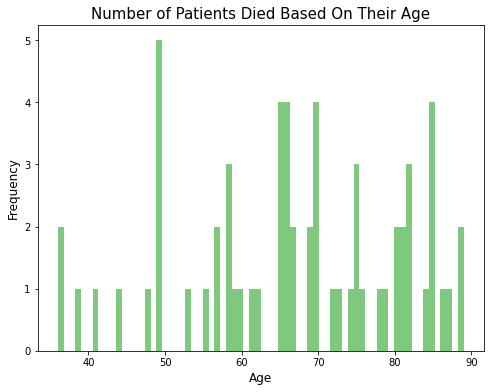

In [22]:
plt.figure(figsize=(8,6))
df[df['death']==1]['age'].plot(kind='hist', bins=70, colormap='Accent')
plt.title('Number of Patients Died Based On Their Age',fontsize=15)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.show()
#Bin values into discrete intervals

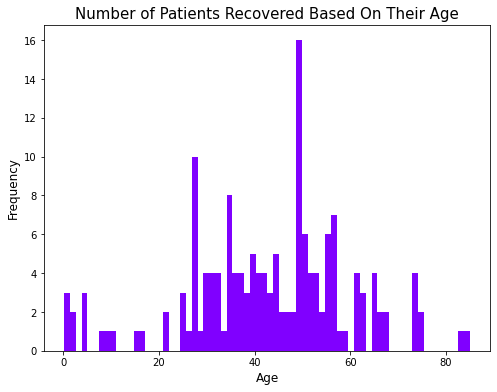

In [23]:
plt.figure(figsize=(8,6))
df[df['recovered']==1]['age'].plot(kind='hist',bins=70,colormap='rainbow')
plt.title('Number of Patients Recovered Based On Their Age',fontsize=15)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.show()

In [24]:
print('Current count of patients:',df['death'].shape[0])
print('Number of Dead Patients:', df[df['death']==1].shape[0])
print('Number of Recovered Patients:',df[df['recovered']==1].shape[0])
print('Number of Patients Receiving Treatment:',df[(df['death']==0)&(df['recovered']==0)].shape[0])

Current count of patients: 1084
Number of Dead Patients: 63
Number of Recovered Patients: 159
Number of Patients Receiving Treatment: 862


In [25]:
print('Current count of patients:',df['death'].count())
print('Number of Dead Patients:', df[df['death']==1]['death'].count())
print('Number of Recovered Patients:',df[df['recovered']==1]['death'].count())
print('Number of Patients Receiving Treatment:',df[(df['death']==0)&(df['recovered']==0)]['death'].count())
#use shape or count

Current count of patients: 1084
Number of Dead Patients: 63
Number of Recovered Patients: 159
Number of Patients Receiving Treatment: 862


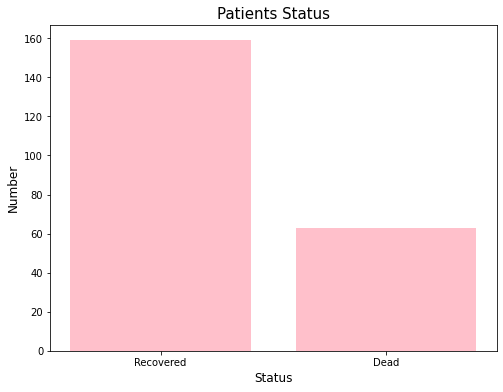

In [26]:
plt.figure(figsize=(8,6))
plt.bar(x=['Recovered','Dead'],height=[159,63], color='pink')
plt.title('Patients Status',fontsize=15)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Number',fontsize=12)
plt.show()

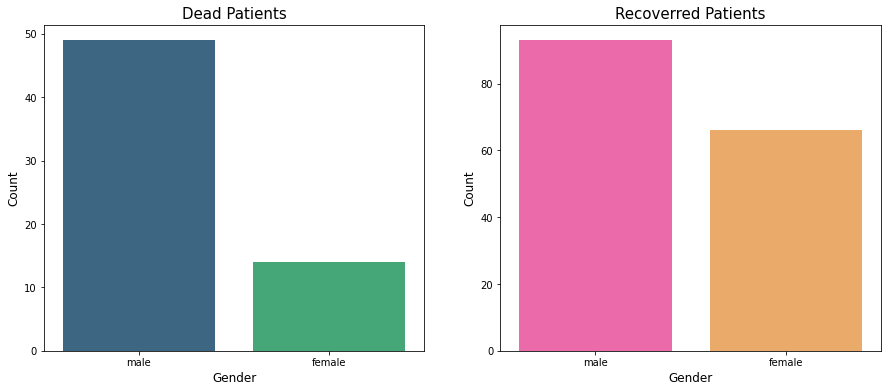

In [27]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x='gender', data=df[df['death']==1], palette='viridis')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Dead Patients',fontsize=15)
plt.subplot(1,2,2)
sns.countplot(x='gender', data=df[df['recovered']==1], palette='spring')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Recoverred Patients',fontsize=15)
plt.show()

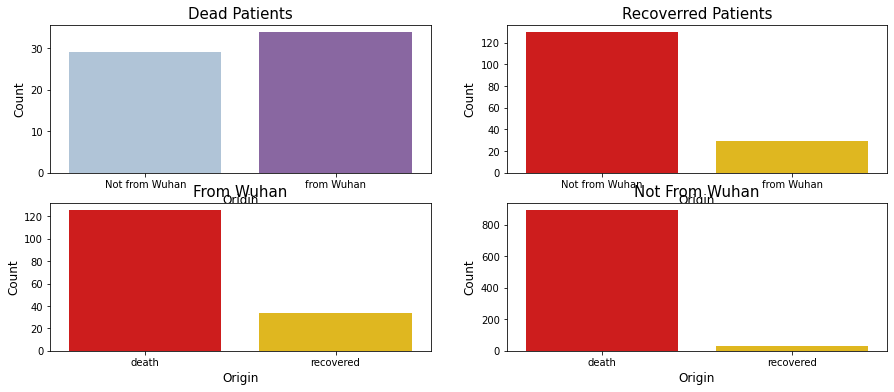

In [28]:
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.countplot(x='from_wuhan', data=df[df['death']==1], palette='BuPu')
plt.xticks([0,1], ['Not from Wuhan','from Wuhan'])
plt.xlabel('Origin', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Dead Patients',fontsize=15)
plt.subplot(2,2,2)
sns.countplot(x='from_wuhan', data=df[df['recovered']==1], palette='hot')
plt.xticks([0,1], ['Not from Wuhan','from Wuhan'])
plt.xlabel('Origin', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Recoverred Patients',fontsize=15)
plt.subplot(2,2,3)
sns.countplot(x='death', data=df[df['from_wuhan']==1], palette='hot')
plt.xticks([0,1], ['death','recovered'])
plt.xlabel('Origin', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('From Wuhan',fontsize=15)
plt.subplot(2,2,4)
sns.countplot(x='death', data=df[df['from_wuhan']==0], palette='hot')
plt.xticks([0,1], ['death','recovered'])
plt.xlabel('Origin', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Not From Wuhan',fontsize=15)
plt.show()

In [29]:
country_order=list(df.groupby('country').count()['location'].sort_values(ascending=False).index)
country_order

['China',
 'Japan',
 'South Korea',
 'Hong Kong',
 'Singapore',
 'Germany',
 'Thailand',
 'France',
 'Taiwan',
 'Spain',
 'Malaysia',
 'UAE',
 'UK',
 'Iran',
 'USA',
 'Bahrain',
 'Vietnam',
 'Australia',
 'Canada',
 'Kuwait',
 'India',
 'Phillipines',
 'Italy',
 'Austria',
 'Russia',
 'Israel',
 'Sweden',
 'Belgium',
 'Cambodia',
 'Switzerland',
 'Egypt',
 'Sri Lanka',
 'Croatia',
 'Finland',
 'Nepal',
 'Lebanon',
 'Algeria',
 'Afghanistan']

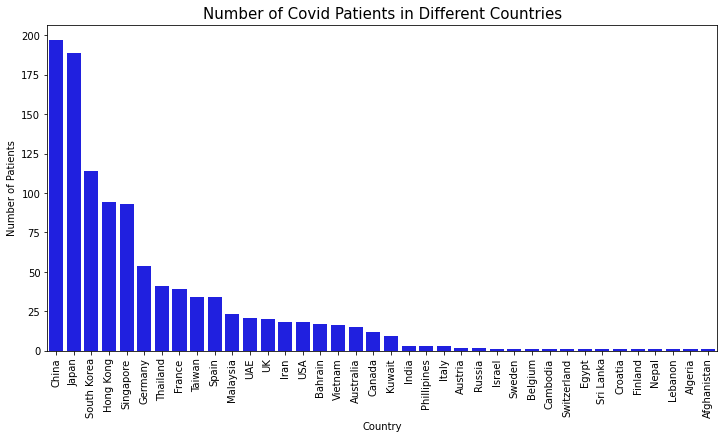

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(x='country',data=df,color='blue',order=country_order)
plt.xticks(rotation=90)
plt.ylabel('Number of Patients')
plt.xlabel('Country')
plt.title('Number of Covid Patients in Different Countries',fontsize=15)
plt.show()

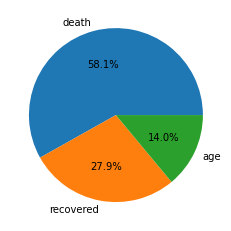

In [31]:
labels = ["death","recovered","age"]
values = [500,240,120]

plt.pie(values, labels = labels, autopct='%1.1f%%')
plt.show()

In [32]:
groupby_df=df.groupby('country').sum()
groupby_df

,age,visiting_wuhan,from_wuhan,death,recovered,month
country,,,,,,
Afghanistan,35.000000,0,0,0,0,2
Algeria,49.483689,0,0,0,0,2
Australia,630.000000,6,8,0,4,21
Austria,48.000000,0,0,0,0,4
Bahrain,841.222716,0,0,0,0,34
Belgium,49.483689,1,0,0,0,2
Cambodia,60.000000,0,1,0,0,1
Canada,511.000000,5,2,0,2,21
China,9656.385824,85,86,39,3,197


# Recovery of Patients

### Label Encoding: Objects -> INT

__Location__

In [33]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [34]:
LE.fit(df['location'])
df['location']=LE.transform(df['location'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084 entries, 0 to 1084
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        1084 non-null   int32  
 1   country         1084 non-null   object 
 2   gender          1084 non-null   object 
 3   age             1084 non-null   float64
 4   visiting_wuhan  1084 non-null   int64  
 5   from_wuhan      1084 non-null   int64  
 6   death           1084 non-null   int64  
 7   recovered       1084 non-null   int64  
 8   month           1084 non-null   int64  
dtypes: float64(1), int32(1), int64(5), object(2)
memory usage: 96.3+ KB


In [35]:
df.head(5)

,location,country,gender,age,visiting_wuhan,from_wuhan,death,recovered,month
0,141,Vietnam,male,0.25,0,0,0,1,2
1,118,Singapore,male,0.50,0,0,0,1,2
2,118,Singapore,male,1.00,0,0,0,1,2
3,42,China,female,2.00,1,0,0,0,1
4,60,Malaysia,male,2.00,0,0,0,1,1


__Country__

In [36]:
LE.fit(df['country'])
df['country']=LE.transform(df['country'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084 entries, 0 to 1084
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        1084 non-null   int32  
 1   country         1084 non-null   int32  
 2   gender          1084 non-null   object 
 3   age             1084 non-null   float64
 4   visiting_wuhan  1084 non-null   int64  
 5   from_wuhan      1084 non-null   int64  
 6   death           1084 non-null   int64  
 7   recovered       1084 non-null   int64  
 8   month           1084 non-null   int64  
dtypes: float64(1), int32(2), int64(5), object(1)
memory usage: 96.3+ KB


__Gender__

In [37]:
LE.fit(df['gender'])
df['gender']=LE.transform(df['gender'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084 entries, 0 to 1084
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        1084 non-null   int32  
 1   country         1084 non-null   int32  
 2   gender          1084 non-null   int32  
 3   age             1084 non-null   float64
 4   visiting_wuhan  1084 non-null   int64  
 5   from_wuhan      1084 non-null   int64  
 6   death           1084 non-null   int64  
 7   recovered       1084 non-null   int64  
 8   month           1084 non-null   int64  
dtypes: float64(1), int32(3), int64(5)
memory usage: 96.3 KB


In [38]:
df.head(5)

,location,country,gender,age,visiting_wuhan,from_wuhan,death,recovered,month
0,141,37,1,0.25,0,0,0,1,2
1,118,26,1,0.50,0,0,0,1,2
2,118,26,1,1.00,0,0,0,1,2
3,42,8,0,2.00,1,0,0,0,1
4,60,22,1,2.00,0,0,0,1,1


# Predicting

In [39]:
y=df['recovered']
X=df[['location','country','gender','age','visiting_wuhan','from_wuhan','month']]

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Random Forest Classifier

In [45]:
RFC =RandomForestClassifier(n_estimators=200)
RFC.fit(X_train,y_train)
predictions_RFC=RFC.predict(X_test)

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 

    |=Total|    Predicted No        Predicted Yes
    Actual No   True Negatives(TN)  False Positives(FP)
    Actual Yes  False Negatives(FN) True Positives (TP)

`Accuracy: Overall, how often is the classifier correct? - (TP+TN)/total`

`Misclassification Rate: Overall, how often is it wrong? - (FP+FN)/total`

`True Positive Rate: When it's actually yes, how often does it predict yes? - TP/actual yes`

`False Positive Rate: When it's actually no, how often does it predict yes? - FP/actual no`

`True Negative Rate: When it's actually no, how often does it predict no? - TN/actual no`

`Precision: When it predicts yes, how often is it correct? - TP/predicted yes`

`Prevalence: How often does the yes condition actually occur in our sample? - actual yes/total`


In [47]:
print(confusion_matrix(y_test,predictions_RFC))
print('\n')
print(classification_report(y_test,predictions_RFC))

[[178   7]
 [ 12  20]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       185
           1       0.74      0.62      0.68        32

    accuracy                           0.91       217
   macro avg       0.84      0.79      0.81       217
weighted avg       0.91      0.91      0.91       217



The report shows the main classification metrics precision, recall and f1-score on a per-class basis. The metrics are calculated by using true and false positives, true and false negatives. Positive and negative in this case are generic names for the predicted classes. There are four ways to check if the predictions are right or wrong:

1. TN / True Negative: when a case was negative and predicted negative
2. TP / True Positive: when a case was positive and predicted positive
3. FN / False Negative: when a case was positive but predicted negative
4. FP / False Positive: when a case was negative but predicted positive

__1. Precision – What percent of your predictions were correct?__
Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

_Precision – Accuracy of positive predictions._
__Precision = TP/(TP + FP)__


    from sklearn.metrics import precision_score
    print("Precision score: {}".format(precision_score(y_true,y_pred)))

__2. Recall – What percent of the positive cases did you catch?__ 

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

_Recall: Fraction of positives that were correctly identified._
__Recall = TP/(TP+FN)__


    from sklearn.metrics import recall_score
    print("Recall score: {}".format(recall_score(y_true,y_pred)))

__3. F1 score – What percent of positive predictions were correct?__ 

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.


__F1 Score = 2*(Recall * Precision) / (Recall + Precision)__


    from sklearn.metrics import f1_score
    print("F1 Score: {}".format(f1_score(y_true,y_pred)))


In [48]:
rf_recovery_acc = accuracy_score(y_test,predictions_RFC)
rf_recovery_acc

0.9124423963133641

# Support Vector Classifier

In [49]:
svc=SVC()
svc.fit(X_train,y_train)
predictions_svc=svc.predict(X_test)

In [50]:
print(classification_report(y_test,predictions_svc))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       185
           1       0.00      0.00      0.00        32

    accuracy                           0.85       217
   macro avg       0.43      0.50      0.46       217
weighted avg       0.73      0.85      0.78       217



C:\Users\ZARRAR\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ZARRAR\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ZARRAR\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

To improve the results obtained by SVC, we define C and gamma parameters.

In [51]:
param_grid={'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001], 'kernel':['rbf']}

In [52]:
gs=GridSearchCV(SVC(),param_grid, verbose=3)
gs.fit(X_train,y_train)
predictions_gs=gs.predict(X_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.851 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.851 total time=   0.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.855 total time=   0.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.855 total time=   0.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.855 total time=   0.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.851 total time=   0.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.851 total time=   0.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.855 total time=   0.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.855 total time=   0.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.855 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.851 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [53]:
print(confusion_matrix(y_test,predictions_gs))
print('\n')
print(classification_report(y_test,predictions_gs))

[[182   3]
 [ 26   6]]


              precision    recall  f1-score   support

           0       0.88      0.98      0.93       185
           1       0.67      0.19      0.29        32

    accuracy                           0.87       217
   macro avg       0.77      0.59      0.61       217
weighted avg       0.84      0.87      0.83       217



In [54]:
svr_recovery_acc = accuracy_score(y_test,predictions_gs)
svr_recovery_acc

0.8663594470046083

# Comparing models by Visuals

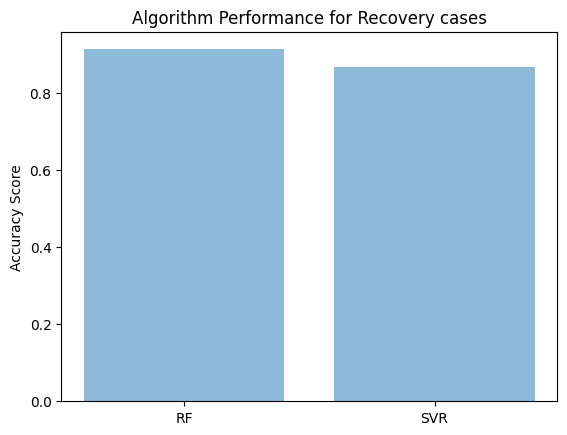

In [55]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('RF','SVR')
y_pos = np.arange(len(objects))
performance = [rf_recovery_acc,svr_recovery_acc]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Algorithm Performance for Recovery cases')

plt.show()

# Predicting Death

In [56]:
y=df['death']
X=df[['location','country','gender','age','visiting_wuhan','from_wuhan','month']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)

In [60]:
rfc2=RandomForestClassifier(n_estimators=200)
rfc2.fit(X_train,y_train)
predictions_rfc2=rfc2.predict(X_test)
print(confusion_matrix(y_test,predictions_rfc2))
print('\n')
print(classification_report(y_test,predictions_rfc2))
rf_death_acc = accuracy_score(y_test,predictions_rfc2)
rf_death_acc

[[202   1]
 [  8   6]]


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       203
           1       0.86      0.43      0.57        14

    accuracy                           0.96       217
   macro avg       0.91      0.71      0.77       217
weighted avg       0.96      0.96      0.95       217



0.9585253456221198

In [61]:
svc2=SVC()
svc2.fit(X_train,y_train)
predictions_svc2=svc2.predict(X_test)
print(confusion_matrix(y_test,predictions_svc2))
print('\n')
print(classification_report(y_test,predictions_svc2))

[[203   0]
 [ 14   0]]


              precision    recall  f1-score   support

           0       0.94      1.00      0.97       203
           1       0.00      0.00      0.00        14

    accuracy                           0.94       217
   macro avg       0.47      0.50      0.48       217
weighted avg       0.88      0.94      0.90       217



C:\Users\ZARRAR\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ZARRAR\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ZARRAR\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [62]:
param_grid={'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001], 'kernel':['rbf']}

In [63]:
gs2=GridSearchCV(SVC(),param_grid, verbose=3)
gs2.fit(X_train,y_train)
predictions_gs2=gs2.predict(X_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.943 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.943 total time=   0.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.948 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.942 total time=   0.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.942 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.943 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.943 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.948 total time=   0.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.942 total time=   0.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.942 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.943 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [64]:
print(confusion_matrix(y_test,predictions_gs2))
print('\n')
print(classification_report(y_test,predictions_gs2))
svr_death_acc = accuracy_score(y_test,predictions_gs2)
svr_death_acc

[[203   0]
 [  8   6]]


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       203
           1       1.00      0.43      0.60        14

    accuracy                           0.96       217
   macro avg       0.98      0.71      0.79       217
weighted avg       0.96      0.96      0.96       217



0.9631336405529954

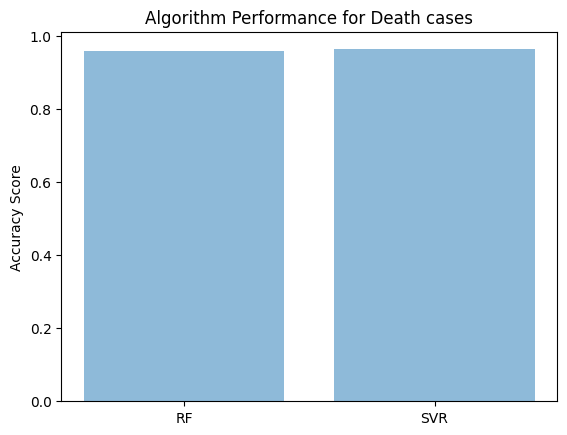

In [65]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('RF','SVR')
y_pos = np.arange(len(objects))
performance = [rf_death_acc,svr_death_acc]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Algorithm Performance for Death cases')

plt.show()